# Making a few maps and animations

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
from xgcm import Grid

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)

In [3]:
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/40165/status,
Dashboard: /proxy/40165/status,Workers: 8
Total threads: 48,Total memory: 188.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38501,Workers: 8
Dashboard: /proxy/40165/status,Total threads: 48
Started: Just now,Total memory: 188.57 GiB
Comm: tcp://10.6.46.72:37931,Total threads: 6
Dashboard: /proxy/36505/status,Memory: 23.57 GiB
Nanny: tcp://127.0.0.1:40787,


In [3]:
depth = cc.querying.getvar('panant-v2','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

## Plot example of daily surface temp

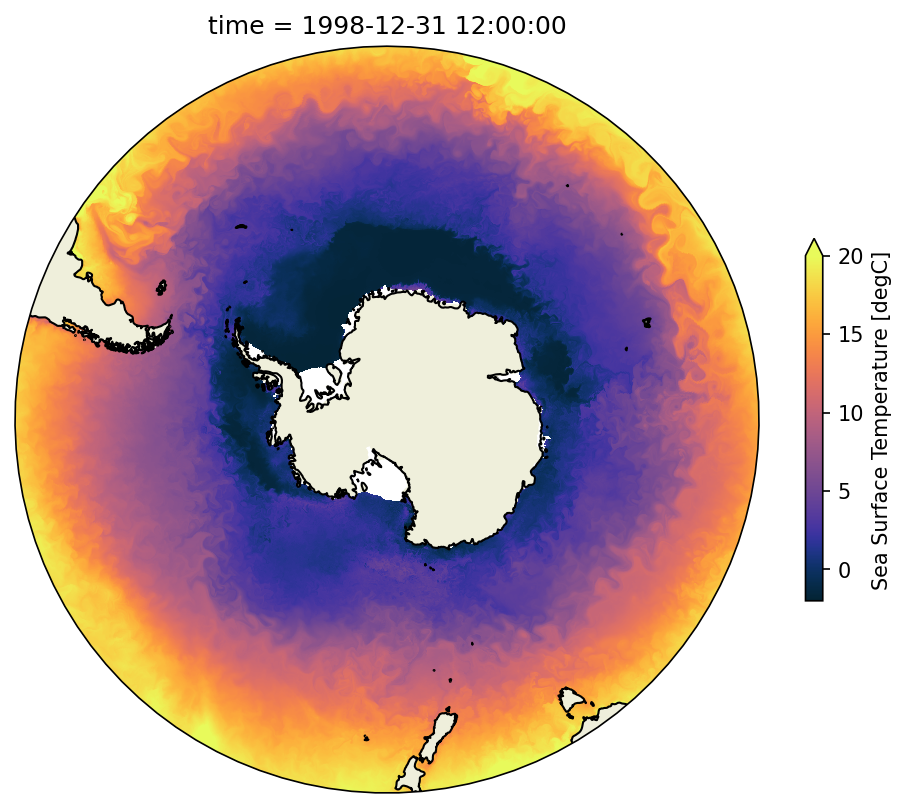

In [5]:
tos = cc.querying.getvar('panant-v2','tos', session)

projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

tos.isel(time=-1).plot(vmin=-2,vmax=20,transform=ccrs.PlateCarree(),cmap=cm.cm.thermal,cbar_kwargs={'shrink': 0.4})
plt.savefig('figures/tos_snapshot.png')

## Plot example of daily SSH

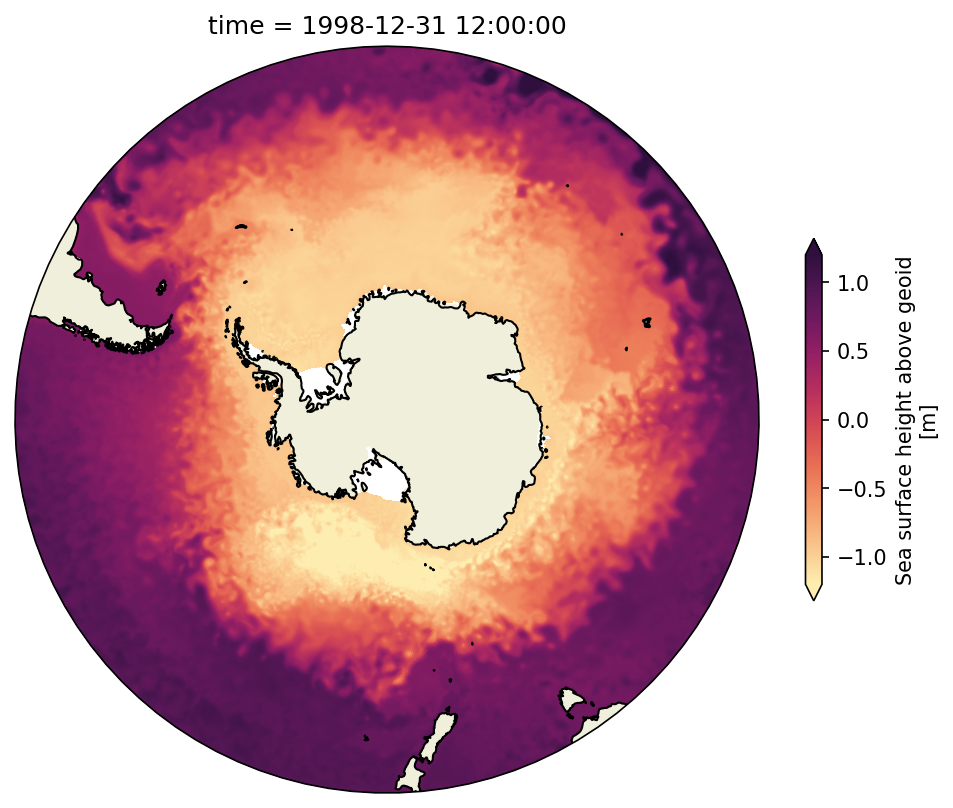

In [6]:
zos = cc.querying.getvar('panant-v2','zos', session)

projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

zos.isel(time=-1).plot(vmin=-1.2,vmax=1.2,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,cbar_kwargs={'shrink': 0.4})

## Plot speed

For both `panant-v2` and `panant-hycom1` cases.

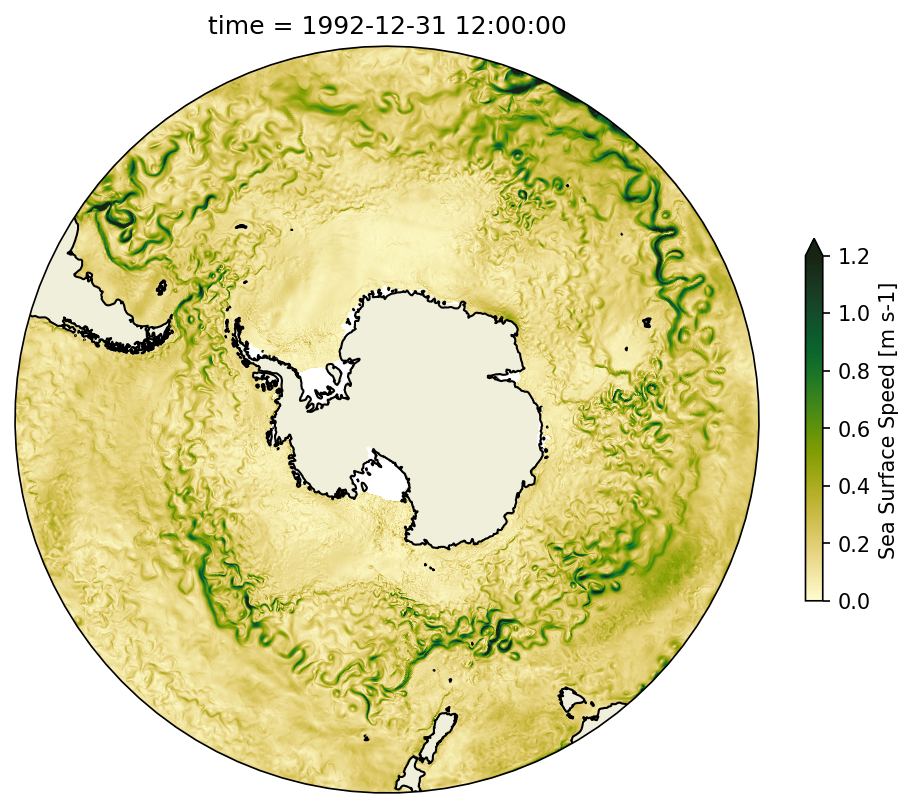

In [7]:
speed = cc.querying.getvar('panant-v3','speed', session)

projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

speed.isel(time=-1).plot(vmin=0,vmax=1.2,transform=ccrs.PlateCarree(),cmap=cm.cm.speed,cbar_kwargs={'shrink': 0.4})

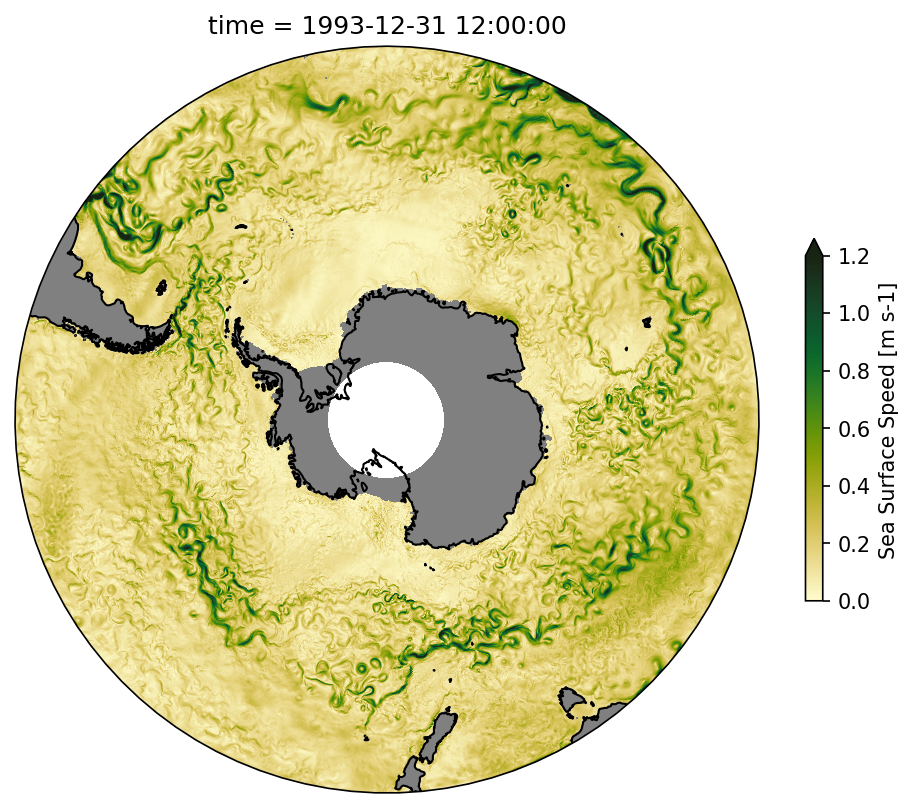

In [5]:
speed = cc.querying.getvar('panant-hycom1-v2','speed', session)

projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
#ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

speed.isel(time=-1).plot(vmin=0,vmax=1.2,transform=ccrs.PlateCarree(),cmap=cm.cm.speed,cbar_kwargs={'shrink': 0.4})
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')

## To make an animation of surface speed:

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150)
for ii in range(speed.time.size):
    
    speed_frame = speed.isel(time=ii)
    
    ax = plt.subplot(1, 1, 1, projection=projection)
    ax.coastlines(resolution='50m')
    ax.set_extent([-280, 80, -82, -37], crs=ccrs.PlateCarree())

    ax.set_boundary(circle, transform=ax.transAxes)

    speed_frame.plot(add_colorbar=False,vmin=0,vmax=1.2,transform=ccrs.PlateCarree(),cmap=cm.cm.speed)
    ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
    plt.title('')
    plt.tight_layout()
    
    filestr = '/g/data/x77/amh157/frames/image%04d.png' % ii
    plt.savefig(filestr,dpi=150)
    plt.clf()
    if np.mod(ii,10)==0:
        print(ii)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870


In [ ]:
!ffmpeg -framerate 20 -pattern_type glob -i '/g/data/x77/amh157/frames/image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p x77/PanAnt/SpeedPanAnt.mp4